In [1]:
from lda import lda
from lda.data.corpus import Corpus
from lda.data.document import Document
from lda.utils import color_by_phis
import matplotlib.pyplot as plt

In [2]:
corpus = Corpus(documents=[
    Document.from_text('Have a jolly christmas at university!'),
    Document.from_text('Merry christmas, Jens Lagergen!'),
    Document.from_text('Christmas is a very merry time.'),
    Document.from_text('Jens Lagergen is the best professor at university.'),
    Document.from_text('Universities are important learning centers. Especially because of Jens Lagergen.'),
    Document.from_text('What even is a university? Experts disagree.')
])
corpus

Corpus with 6 documents

In [3]:
corpus.documents[0].included_words

[Word(original_form='jolly', lda_form='jolly', include=True),
 Word(original_form='christmas', lda_form='christmas', include=True),
 Word(original_form='university', lda_form='university', include=True)]

In [4]:
corpus.documents[1].included_words

[Word(original_form='Merry', lda_form='merry', include=True),
 Word(original_form='christmas', lda_form='christmas', include=True),
 Word(original_form='Jens', lda_form='jens', include=True),
 Word(original_form='Lagergen', lda_form='lagergen', include=True)]

In [5]:
corpus.documents[2].included_words

[Word(original_form='Christmas', lda_form='christmas', include=True),
 Word(original_form='merry', lda_form='merry', include=True),
 Word(original_form='time', lda_form='time', include=True)]

In [6]:
corpus.documents[3].included_words

[Word(original_form='Jens', lda_form='jens', include=True),
 Word(original_form='Lagergen', lda_form='lagergen', include=True),
 Word(original_form='best', lda_form='good', include=True),
 Word(original_form='professor', lda_form='professor', include=True),
 Word(original_form='university', lda_form='university', include=True)]

In [7]:
corpus.documents[2].included_words[-1] == corpus.documents[3].included_words[0]

False

In [8]:
corpus.word_count

Counter({Word(original_form='jolly', lda_form='jolly', include=True): 1,
         Word(original_form='christmas', lda_form='christmas', include=True): 3,
         Word(original_form='university', lda_form='university', include=True): 4,
         Word(original_form='Merry', lda_form='merry', include=True): 2,
         Word(original_form='Jens', lda_form='jens', include=True): 3,
         Word(original_form='Lagergen', lda_form='lagergen', include=True): 3,
         Word(original_form='time', lda_form='time', include=True): 1,
         Word(original_form='best', lda_form='good', include=True): 1,
         Word(original_form='professor', lda_form='professor', include=True): 1,
         Word(original_form='important', lda_form='important', include=True): 1,
         Word(original_form='learning', lda_form='learning', include=True): 1,
         Word(original_form='centers', lda_form='center', include=True): 1,
         Word(original_form='Especially', lda_form='especially', include=True): 1

In [9]:
out = lda(corpus, num_topics=2, num_iterations=64)
params = out['params']
lower_bound_evol = out['lower_bound_evol']

Attempt 0:   0%|          | 0/64 [00:00<?, ?it/s]

In [10]:
params

{'alpha': array([0.02902788, 0.00598489]),
 'beta': [{Word(original_form='disagree', lda_form='disagree', include=True): 0.0,
   Word(original_form='christmas', lda_form='christmas', include=True): 0.13636363636363635,
   Word(original_form='important', lda_form='important', include=True): 0.045454545454545456,
   Word(original_form='Experts', lda_form='expert', include=True): 0.0,
   Word(original_form='learning', lda_form='learning', include=True): 0.045454545454545456,
   Word(original_form='Especially', lda_form='especially', include=True): 0.045454545454545456,
   Word(original_form='professor', lda_form='professor', include=True): 0.045454545454545456,
   Word(original_form='university', lda_form='university', include=True): 0.13636363636363635,
   Word(original_form='centers', lda_form='center', include=True): 0.045454545454545456,
   Word(original_form='jolly', lda_form='jolly', include=True): 0.045454545454545456,
   Word(original_form='Jens', lda_form='jens', include=True): 0

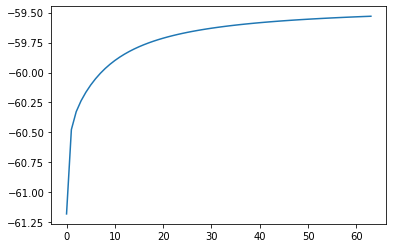

In [11]:
plt.figure()
plt.plot(lower_bound_evol)

In [12]:
lower_bound_evol

array([-61.17998647, -60.47611074, -60.32726905, -60.23652025,
       -60.16497412, -60.10447355, -60.05219002, -60.00657968,
       -59.96653338, -59.93117398, -59.89978903, -59.87179046,
       -59.84669425, -59.82409846, -59.80366779, -59.78512119,
       -59.76822194, -59.75276967, -59.73859399, -59.72554925,
       -59.71351045, -59.70236974, -59.69203374, -59.68242121,
       -59.67346121, -59.66509179, -59.65725789, -59.64991123,
       -59.64300903, -59.63651327, -59.63039004, -59.62460905,
       -59.61914311, -59.6139678 , -59.60906112, -59.60440317,
       -59.59997596, -59.59576315, -59.59174987, -59.5879226 ,
       -59.58426897, -59.58077768, -59.57743836, -59.57424151,
       -59.57117838, -59.56824092, -59.5654217 , -59.56271384,
       -59.56011102, -59.55760733, -59.55519732, -59.55287594,
       -59.55063845, -59.54848047, -59.54639791, -59.54438694,
       -59.542444  , -59.54056575, -59.53874906, -59.53699101,
       -59.53528883, -59.53363995, -59.53204194, -59.53

In [13]:
colored = color_by_phis(corpus, params['phis'])
for text in colored.values():
    print(text)

Have a jolly christmas at university !
Merry christmas , Jens Lagergen !
Christmas is a very merry time .
Jens Lagergen is the best professor at university .
Universities are important learning centers . Especially because of Jens Lagergen .
What even is a university ? Experts disagree .
